In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('final_1.csv')
housing_df = pd.read_csv('psam_h36.csv')

In [3]:
df = pd.read_csv('final_1.csv')
housing_df = pd.read_csv('psam_h36.csv')
_df = pd.merge(df, housing_df[['SERIALNO', 'FINCP', 'NP', 'HINCP', 'TYPE']], on = 'SERIALNO')
# _df

In [4]:
# df = pd.read_csv('final_1.csv')
synthetic = _df.groupby(['SERIALNO']).agg({'PINCP':'sum'}).reset_index()
synthetic.columns = ['SERIALNO', 'synt_HINCP']
_df = pd.merge(_df, synthetic, on='SERIALNO')
# _df

In [5]:
pd.set_option('display.max_rows', 110)

In [6]:
_hicov2 = _df.loc[df['HICOV'].eq(2)]
_hicov1 = _df.loc[df['HICOV'].eq(1)]


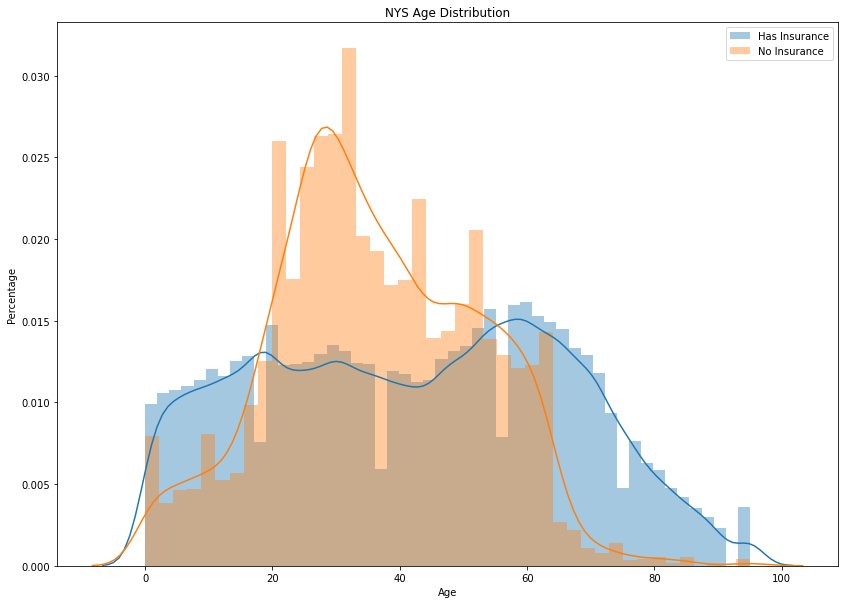

In [7]:
plt.figure(figsize=(14,10))
sns.distplot(_hicov1['AGEP'], label = 'Has Insurance')
sns.distplot(_hicov2['AGEP'], label = 'No Insurance')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('NYS Age Distribution')
plt.savefig('NYS Age Distribution', bbox_inches = 'tight',pad_inches = 0);

In [8]:
_albert = _df.copy()

In [9]:
conditions = [_albert['SEX'].eq(1), _albert['SEX'].eq(2)]
choices = ['Male', 'Female']
_albert['SEX'] = np.select(conditions, choices, 'Unknown')

conditions = [_albert['HICOV'].eq(1), _albert['HICOV'].eq(2)]
choices = ['Has Health Insurance', 'No Health Insurance']
_albert['HICOV'] = np.select(conditions,choices, 'Unknown')

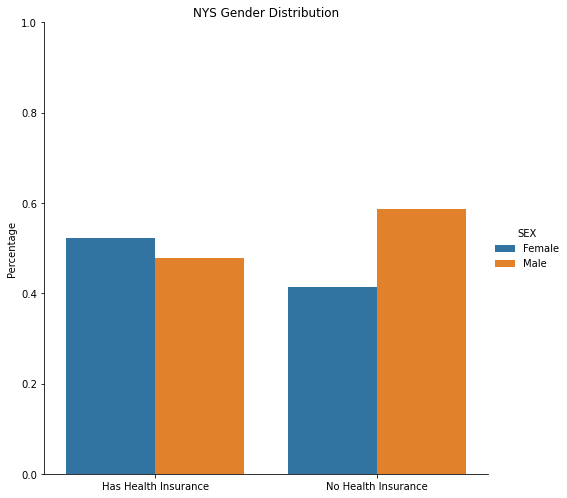

In [10]:
_albert_SEX = _albert.groupby(['HICOV'])['SEX'].value_counts(normalize=True)
_albert_SEX = _albert_SEX.rename('Percentage').reset_index()
# fig,ax = plt.subplots(figsize=(14,10))
# fig, ax = plt.subplots()
g = sns.catplot(x='HICOV', y= 'Percentage', hue='SEX', kind='bar', data= _albert_SEX, height=7)
# plt.figure(figsize=(14,10))
# sns.catplot(x=)
g.ax.set_ylim(0,1)
# for p in g.ax.patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() 
#     txt_y = p.get_height()
#     g.ax.text(txt_x,txt_y,txt)
plt.title('NYS Gender Distribution')
plt.xlabel('')
plt.savefig('NYS Gender Distribution', bbox_inches = 'tight',pad_inches = 0);


In [11]:
conditions = [_albert['MAR'].eq(1), _albert['MAR'].eq(2), _albert['MAR'].eq(3), _albert['MAR'].eq(4), _albert['MAR'].eq(5)]
choices = ['Married', 'Widowed', 'Divorced', 'Separated', 'Never Married']

_albert['MAR'] = np.select(conditions, choices, 'Unknown')

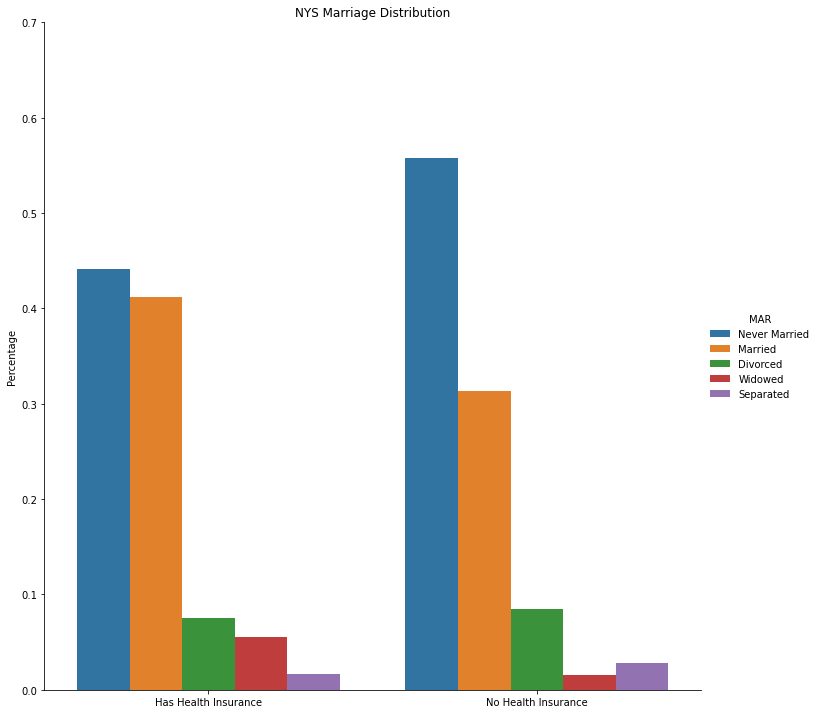

In [12]:
_albert_MAR = _albert.groupby(['HICOV'])['MAR'].value_counts(normalize=True)
_albert_MAR = _albert_MAR.rename('Percentage').reset_index()
# fig,ax = plt.subplots(figsize=(14,10))
g = sns.catplot(x='HICOV', y= 'Percentage', hue='MAR', kind='bar', data= _albert_MAR, height = 10)
g.ax.set_ylim(0,.7)
# plt.figure(figsize=(14,10))
# sns.catplot(x=)
plt.xlabel('')
plt.title('NYS Marriage Distribution')
plt.savefig('NYS Marriage Distribution', bbox_inches = 'tight',pad_inches = 0);

In [13]:
df['RAC1P_cat'].value_counts()

White              138474
Black               24024
 Asian              17030
Some_Other          10964
GT2_race             5646
American_Indian       752
Native_Hawaii          72
Alaska_Native           5
Name: RAC1P_cat, dtype: int64

In [14]:
conditions = [_albert['RAC1P_cat'].eq('White'), _albert['RAC1P_cat'].eq('Black'), _albert['RAC1P_cat'].eq(' Asian'), _albert['RAC1P_cat'].eq('Some_Other'),
             _albert['RAC1P_cat'].eq('GT2_race'), _albert['RAC1P_cat'].isin(['American_Indian','Native_Hawaii', 'Alaska_Native'])]
choices = ['White', 'Black', 'Asian', 'Other', 'More Than One Race', 'American Indigenous']

_albert['RACES'] = np.select(conditions, choices, 'Unknown')

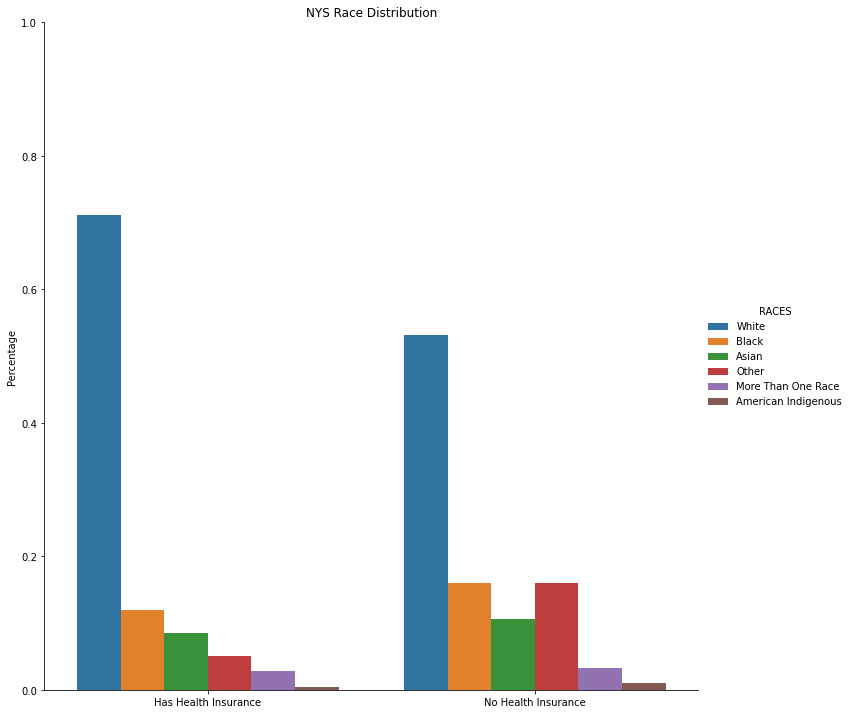

In [15]:
_albert_RACE = _albert.groupby(['HICOV'])['RACES'].value_counts(normalize=True)
_albert_RACE = _albert_RACE.rename('Percentage').reset_index()
# fig,ax = plt.subplots(figsize=(14,10))
g = sns.catplot(x='HICOV', y= 'Percentage', hue='RACES', kind='bar', data= _albert_RACE, height = 10)
g.ax.set_ylim(0,1)
# plt.figure(figsize=(14,10))
# sns.catplot(x=)
plt.xlabel('')
plt.title('NYS Race Distribution')
plt.savefig('NYS Race Distribution', bbox_inches = 'tight',pad_inches = 0);

In [16]:
conditions = [_albert['INDP'].str.startswith('AGR'), _albert['INDP'].str.startswith('EXT'), _albert['INDP'].str.startswith('UTL'),
             _albert['INDP'].str.startswith('CON'), _albert['INDP'].str.startswith('MFG'), _albert['INDP'].str.startswith('WHL'),
             _albert['INDP'].str.startswith('RET'), _albert['INDP'].str.startswith('TRN'), _albert['INDP'].str.startswith('INF'),
             _albert['INDP'].str.startswith('FIN'), _albert['INDP'].str.startswith('PRF'), _albert['INDP'].str.startswith('EDU'),
             _albert['INDP'].str.startswith('MED'),              
             _albert['INDP'].str.startswith('SCA'), _albert['INDP'].str.startswith('ENT'), _albert['INDP'].str.startswith('SRV'),
             _albert['INDP'].str.startswith('ADM'), _albert['INDP'].str.startswith('MIL'), _albert['INDP'].str.startswith('None')]
choices = ['Agriculture', 'Extraction', 'Utilities',
          'Construction', 'Manufacturing', 'Wholesale',
          'Retail', 'Transportation', 'Information',
          'Finance', 'Professional', 'Education',
          'Medical',
          'Social Service', 'Entertainment', 'Service',
          'Administration', 'Military', 'None']

_albert['INDUSTRY'] = np.select(conditions, choices, 'None')

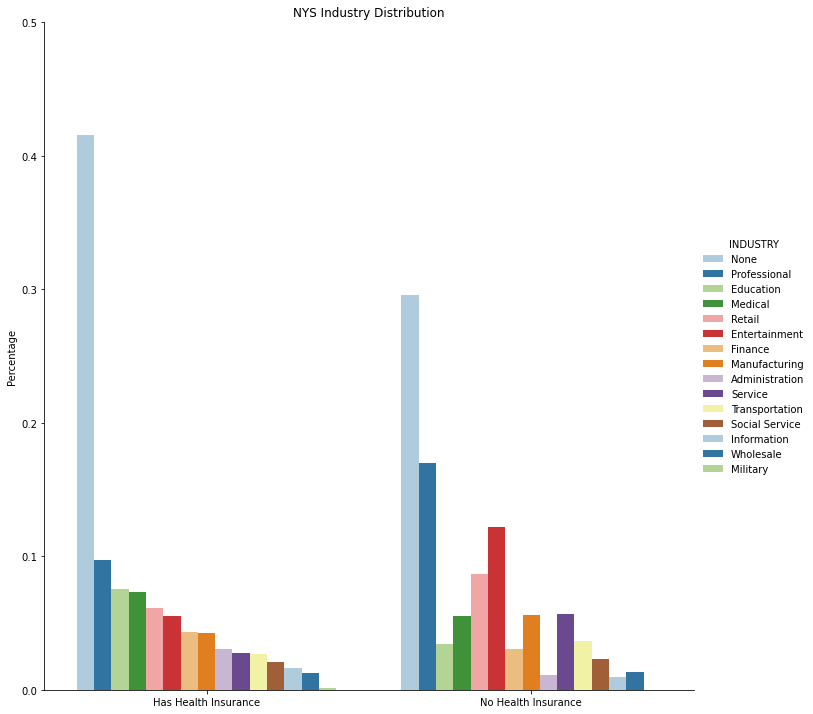

In [17]:
_albert_INDUSTRY = _albert.groupby(['HICOV'])['INDUSTRY'].value_counts(normalize=True)
_albert_INDUSTRY = _albert_INDUSTRY.rename('Percentage').reset_index()
# fig,ax = plt.subplots(figsize=(14,10))
g = sns.catplot(x='HICOV', y= 'Percentage', hue='INDUSTRY', kind='bar', data= _albert_INDUSTRY, height = 10, palette='Paired')
g.ax.set_ylim(0,.5)
# plt.figure(figsize=(14,10))
# sns.catplot(x=)
plt.xlabel('')
plt.title('NYS Industry Distribution')
plt.savefig('NYS Industry Distribution', bbox_inches = 'tight',pad_inches = 0);